In [2]:
from main import load_or_create_the_inverted_index ,ORIGIN_DATA ,InvertedIndex,Statistic
from query import Query

In [3]:
load_or_create_the_inverted_index()

loading index from file


In [31]:
def print_origin_new(res):
     for i,j in enumerate(res):
            
            print(ORIGIN_DATA[j]['title'] +" -- "+str(i+1))
            print("doc_id =",j,"                        ")
            print()
            print()
        

# سوال۱ 
ابتدا متن را گرفته و لینک هارو از ان حذف میکنیم با ریجکس

سپس حروف های اضافه مانند ()!*# و.. را حذف میکنیم
حالا متن ما نرمال شده
سپس توکنایز میکنیم 
و بعد توکن های پرتکرار یا همان stopwords هارو حذف میکنیم و در نهایت  ریشه یابی رو روی توکن ها انجام میدهیم

# سوال2 
اگر  کلمات پر تکرار را حذف نکنیم

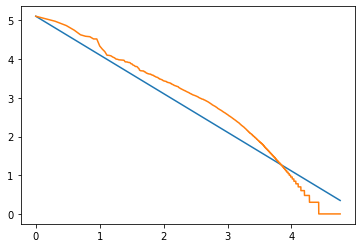

In [10]:
import matplotlib.pyplot as plt
import math
With_stops_INDEX = './data/with_stops_index'

InvertedIndex.load(Without_stops_INDEX)

x= InvertedIndex.get_counts()
len_key = len(list(x.keys()))
values = list(x.values())
values.sort(key=lambda t:t,reverse=True)


max_number = values[0]

l = []
l2 = []
l3 = []
for i in values:
    l3.append(math.log(i, 10))

for i in range(len_key):
    l.append(math.log(i+1, 10))
    l2.append(math.log(max_number/(i+1), 10))

plt.plot(l, l2)
plt.plot(l, l3)
plt.show()



و اگر  کلمات پر تکرار را حذف کنیم

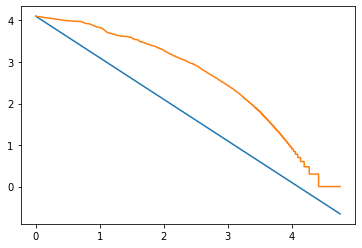

In [11]:
import matplotlib.pyplot as plt
import math
NORMAL_INDEX = './data/index'

InvertedIndex.load(NORMAL_INDEX)

x= InvertedIndex.get_counts()
len_key = len(list(x.keys()))
values = list(x.values())
values.sort(key=lambda t:t,reverse=True)


max_number = values[0]

l = []
l2 = []
l3 = []
for i in values:
    l3.append(math.log(i, 10))

for i in range(len_key):
    l.append(math.log(i+1, 10))
    l2.append(math.log(max_number/(i+1), 10))

plt.plot(l, l2)
plt.plot(l, l3)
plt.show()



اگر در نمودار اول دقت کنیم دو خط در نمودار به هم نزدیک تر هستند پس خط آبی یا همون تخمین ما دقیق تر بوده است و تخمین بهتری است

ما کلمات پرتکرار را در اون حالت حذف نکرده ایم پس تخمینمون طبق قانون zipf خواهد بود

# سوال۳


همانطور که میبینیم برای هر دو حالت خط آبی و خط زرد تقریبا خطی هستنید و این نشان دهنده این است که قانون 
heaps
در این سوال برای هردوحالت صدق میکند و در فرمول  قانون هیپ با 
b=~0.6
صدق میکند


تعداد کل توکن ها در حالت بدون ریشه یابی 1545594
تعداد واژه‌نامه  در حالت بدون ریشه یابی 71654


تعداد کل توکن ها در حالت با ریشه یابی 1451101
تعداد واژه‌نامه  در حالت با ریشه یابی 57120


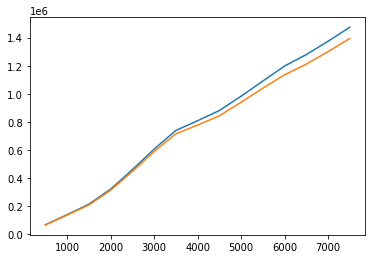

In [44]:
import matplotlib.pyplot as plt

statistic_without_stem= './data/statistic_without_stem'
normal ='./data/statistic'

Statistic.load(statistic_without_stem)
print('تعداد کل توکن ها در حالت بدون ریشه یابی',list(Statistic.items.values())[-1].tokens)
print('تعداد واژه‌نامه  در حالت بدون ریشه یابی',list(Statistic.items.values())[-1].vocab_size)
plt.plot(Statistic.items.keys(), [i.tokens-i.vocab_size for i in Statistic.items.values()])
print()
print()
Statistic.load(normal)
print('تعداد کل توکن ها در حالت با ریشه یابی',list(Statistic.items.values())[-1].tokens)
print('تعداد واژه‌نامه  در حالت با ریشه یابی',list(Statistic.items.values())[-1].vocab_size)
plt.plot(Statistic.items.keys(), [i.tokens-i.vocab_size for i in Statistic.items.values()])

plt.show()

# سوال 4

۱ در بعضی از حالات نمیخواهیم ریشه یابی انجام شود برای مثال کلمه "مردم" و فعل "مردم" که به "مرد" ریشه یابی میشوند

۲ بعضی از   ضعف های کتابخانه هضم که برای مثال کلمه "پیام" رو به "پیا" ریشه یابی میکرد

۳ ریشه برخی کلمات دوحرفی  هستند و با کلمات پر تکرار اشتباه میشوند مانند دریدن که ریشه آن در است

# توضیحاتی در مورد کلاس  Query

این کلاس دارای سه متد است که :

best_Search برای ما بهترین و دقیق‌ترین سرچ را انجام میدهد و داک هایی را برمیگرداند که دقیقا به همان ترتیب سرچ و پشت‌سر هم در متن امده است و این جواب‌ها دقیقا با خواسته کاربر مطابقت دارند

sub_search تمام زیر حالت های ممکن از کلمات را ساخته و سرچ میکند ( اول زیر ترکیب های بزرگتر سپس کوچکتر را برمیگرداند)

full_search ابتدا best_search را صدا میزند و جواب هارو در لیست ریخته سپس sub_search  را صدا میزند و جوابها را به ته آن لیست اضافه میکند و در آخر با حفظ اولویت تکراری هارا حذف میکند

# سوال ۵

###   الف) بین‌الملل

In [32]:
res =Query('بین‌الملل').best_search()
print_origin_new(res)

توضیحات مسؤول مسابقات لیگ یک درباره شایعه سکته ناظر بازی -- 1
doc_id = 153                         


اعلام آخرین اقدامات تراکتور برای بازشدن پنجره/ احتمال استفاده از بازیکنان جدید برابر گل‌گهر -- 2
doc_id = 410                         


گزارش تمرین پرسپولیس| روحیه شاد قبل از مصاف با الهلال/ پا به توپ شدن گل‌محمدی و باقری -- 3
doc_id = 733                         


واکنش نصیرزاده به اظهارات مالک ماشین سازی: به جای فرافکنی به تعهداتتان عمل کنید -- 4
doc_id = 767                         


باج بن سلمان به انگلیس و قطر/ پروژه فوتبالی آل سعود چگونه رقم خورد؟ -- 5
doc_id = 976                         


پنجره نقل و انتقالات باشگاه فولاد خوزستان باز شد -- 6
doc_id = 994                         


معاون بین‌الملل و  مدیر کمیته حرفه ای سازی باشگاه استقلال منصوب شدند -- 7
doc_id = 1008                         


باشگاه پرسپولیس خواستار ارسال تاییدیه AFC برای هتل محل اقامت -- 8
doc_id = 1073                         


تائید حضور تماشاگر در دیدار تیم ملی فوتبال مقابل کره جنوبی توسط وزیر ورزش --

###   ب) دانشگاه امیرکبیر

In [33]:
res =Query('دانشگاه امیرکبیر').best_search()
print_origin_new(res)

برگزاری یادبودی برای محمدسرور رجایی -- 1
doc_id = 7236                         


نامه ۸ بسیج دانشجویی دانشگاه‌های تهران به معاون اول رئیس جمهور -- 2
doc_id = 1959                         


امروز محیط دانشگاه‌های ما عرصه دفاع مقدس است -- 3
doc_id = 2792                         


باید برای ثبت نقش دانشگاهیان در دوران دفاع مقدس کار تحقیقاتی صورت گیرد -- 4
doc_id = 2793                         


بزرگداشت شهدای مسجد قندوز در مقابل کنسولگری افغانستان/ آمریکا و آل سعود مقصران اصلی جنایت در افغانستان -- 5
doc_id = 2131                         


نامه جمعی از اساتید و متخصصان/ آقای رئیس‌جمهور در گام دوم انقلاب به داد «مدیریت» در کشور برسید -- 6
doc_id = 1753                         




In [ ]:
res =Query('دانشگاه امیرکبیر').full_search()
print_origin_new(res)

### پ)
### دانشگاه صنعتی امیرکبیر، سازمان ملل متحد، جمهوری اسلامی ایران

In [34]:
res =Query('دانشگاه صنعتی امیرکبیر').best_search()
print_origin_new(res)

باید برای ثبت نقش دانشگاهیان در دوران دفاع مقدس کار تحقیقاتی صورت گیرد -- 1
doc_id = 2793                         


دفترچه راهنمای آزمون استخدامی دانشگاه‌ها برای بار چهارم اصلاح شد/تمدید مجدد مهلت ثبت‌نام -- 2
doc_id = 5021                         


دفترچه راهنمای آزمون استخدامی دانشگاه‌ها برای بار چهارم اصلاح شد/تمدید مجدد مهلت ثبت‌نام -- 3
doc_id = 5022                         




In [ ]:
res =Query('دانشگاه صنعتی امیرکبیر').full_search()
print_origin_new(res)

In [35]:
res =Query('سازمان ملل متحد').best_search()
print_origin_new(res)

شعرهای میوه‌ای -- 1
doc_id = 6799                         


مخاصمات مسلحانه در غرب پروژه‌ای صهیونیستی و آمریکایی است -- 2
doc_id = 4767                         


رایزنی وزیران امور خارجه ایران و ونزوئلا فردا در تهران -- 3
doc_id = 4772                         


جان‌مایه سخنان رئیس‌جمهور -- 4
doc_id = 2726                         


استدلال‌ها برای ادامه جنگ بعد از فتح خرمشهر چه بود؟ -- 5
doc_id = 6567                         


نیروهای مسلح بساط گروه‌های ضد انقلاب مسلح را جمع خواهند کرد -- 6
doc_id = 2861                         


جزئیات برنامه‌های اتحادیه بین المجالس در وین -- 7
doc_id = 3374                         


۳ راهبرد دولت آیت‌الله رئیسی برای شکست تحریم‌ها -- 8
doc_id = 2426                         


آصفری: اظهارات رئیسی در سازمان ملل اقدامی برای رسوا کردن غربی ها و احقاق حقوق مردم بود -- 9
doc_id = 2741                         


گزارش نظارت میدانی نمایندگان از مرزهای شمال‌غرب به کمیسیون امنیت ملی -- 10
doc_id = 1973                         


راستینه: اظهارات آیت الله

In [36]:
res =Query('جمهوری اسلامی ایران').best_search()
print_origin_new(res)

پیام نوروزی محمدعلی موحد -- 1
doc_id = 6144                         


مگر چند تا میدان خراسان داریم؟! -- 2
doc_id = 2053                         


قید «محرمانگی» بر اموال مسئولان در زمان ریاست هاشمی بر مجمع  گذاشته شد -- 3
doc_id = 2054                         


فرمانده ارتش: بصیرت و روحیه سلحشوری موتور محرکه اجرای ماموریتهاست -- 4
doc_id = 2058                         


سرلشکر سلامی: نیروی دریایی سپاه به مرز آمادگی رزمی عملیاتی «واکنش سریع» رسیده است -- 5
doc_id = 2061                         


تاکید گروه‌های دوستی ایران و برزیل بر ارتقای ظرفیت‌های تجاری دو کشور -- 6
doc_id = 2071                         


علـی‌اف، تاریـخ بخـوان! -- 7
doc_id = 2082                         


رایزنی سرلشکر باقری و نخست‌وزیر پاکستان درباره آخرین تحولات امنیتی منطقه -- 8
doc_id = 2083                         


مقاومت انقلابی یا سرسپردگی در سیاست خارجی؟ -- 9
doc_id = 2084                         


رزمایش مشترک تخصصی پدافند هوایی مدافعان آسمان ولایت ۱۴۰۰ پایان یافت -- 10
doc_id = 2088              

###   ت) ژیمناستیک 

In [37]:
res =Query('ژیمناستیک').best_search()
print_origin_new(res)

خیرخواه: برخی به دنبال فلج کردن ژیمناستیک هستند/ با بایکوت فدراسیون موفقیت‌ها بیشتر شد -- 1
doc_id = 632                         


هشدار هیات ژیمناستیک تهران در خصوص سالن‌های مختلط و اقدامات غیراخلاقی -- 2
doc_id = 1367                         


دبیر مجمع فدراسیون ژیمناستیک مشخص شد -- 3
doc_id = 3615                         


ثبت نام ۱۳ نامزد برای پست ریاست فدراسیون ژیمناستیک + اسامی -- 4
doc_id = 3664                         


جزییات تعطیلی ورزش ایران تا پایان تیرماه+ تصویر -- 5
doc_id = 3878                         


دبیر: اگر من در مباحث فنی ۱۰ باشم، درستکار ۱۰۰ است/ بنا کاملا بر اساس چرخه انتخابی عمل کرد! -- 6
doc_id = 4056                         


جزییات تعطیلی‌های ورزش ایران تا ۹ مهر ۱۴۰۰/ کدام فعالیت‌های ورزشی در تهران ممنوع است؟ -- 7
doc_id = 4188                         




###   ث) واکسن آسترازنکا 

In [38]:
res =Query('واکسن آسترازنکا').best_search()
print_origin_new(res)


محموله ۱.۴ میلیون دوزی واکسن کرونا وارد کشور شد -- 1
doc_id = 5569                         


نکاتی که باید در مورد واکسیناسیون کرونا بدانیم  -- 2
doc_id = 5825                         


محموله ۱.۴ میلیون دوزی واکسن کرونا وارد کشور شد -- 3
doc_id = 4931                         


واکسن‌های کرونا با چه داروهایی تداخل دارند؟ -- 4
doc_id = 5857                         


نکاتی که باید در مورد واکسیناسیون کرونا بدانیم  -- 5
doc_id = 5833                         


مهم‌ترین سلاح مبارزه با کرونا -- 6
doc_id = 5685                         


مقررات تازه برای سفر زمینی ایران و ارمنستان -- 7
doc_id = 5845                         




In [39]:
res =Query('واکسن آسترازنکا').full_search()
print_origin_new(res)


محموله ۱.۴ میلیون دوزی واکسن کرونا وارد کشور شد -- 1
doc_id = 5569                         


نکاتی که باید در مورد واکسیناسیون کرونا بدانیم  -- 2
doc_id = 5825                         


محموله ۱.۴ میلیون دوزی واکسن کرونا وارد کشور شد -- 3
doc_id = 4931                         


واکسن‌های کرونا با چه داروهایی تداخل دارند؟ -- 4
doc_id = 5857                         


نکاتی که باید در مورد واکسیناسیون کرونا بدانیم  -- 5
doc_id = 5833                         


مهم‌ترین سلاح مبارزه با کرونا -- 6
doc_id = 5685                         


مقررات تازه برای سفر زمینی ایران و ارمنستان -- 7
doc_id = 5845                         


امکان ایجاد لخته خون در واکسن  آسترازنکا چقدر است؟ -- 8
doc_id = 6336                         


واکسیناسیون؛عقلانی‌ترین راه مقابله با کرونا/پرهیز از تزریق واکسن خارج از چرخه عمومی واکسیناسیون -- 9
doc_id = 5831                         


واکسیناسیون؛عقلانی‌ترین راه مقابله با کرونا/پرهیز از تزریق واکسن خارج از چرخه عمومی واکسیناسیون -- 10
doc_id = 5823              